In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pandas.tools import plotting

# Stats
from scipy import stats
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Allows plotting viewed in the notebook
%matplotlib inline

In [2]:
# Loading data
data = pd.read_csv('brain_size.csv', sep=';', na_values = ".")

# Cleaning the data and removing any missing values
del data['Unnamed: 0']
data= data.dropna()

# Taking a quick look at the data
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799


##### Now that we have an idea of what's in out data set let's ask some questions.

In [3]:
# How many people were in this study?

len(data)

38

In [4]:
# How many were male and how many were females?

data['Gender'].value_counts()

Female    20
Male      18
Name: Gender, dtype: int64

In [5]:
# Now let's group the data by gender so we can run some statistics broken down by sex if wanted
grouped_gender = data.groupby('Gender')

{'boxes': [<matplotlib.lines.Line2D at 0x10e508d0>,
 'caps': [<matplotlib.lines.Line2D at 0x10e5f550>,
 'fliers': [<matplotlib.lines.Line2D at 0x10e6c5f8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10e6c080>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10e50a90>,
  <matplotlib.lines.Line2D at 0x10f2fb70>]}

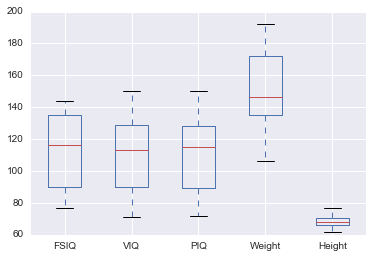

In [17]:
# Let's take a look at the overall data on a few factors


data.boxplot(column=['FSIQ','VIQ','PIQ', 'Weight', 'Height'], return_type= 'dict')

This provides a visualization of the spread in the data within each variable measured.

OrderedDict([('Female',
              {'boxes': [<matplotlib.lines.Line2D at 0x112294e0>,
               'caps': [<matplotlib.lines.Line2D at 0x11237198>,
               'fliers': [<matplotlib.lines.Line2D at 0x11237ef0>,
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x11237c88>,
               'whiskers': [<matplotlib.lines.Line2D at 0x112295f8>,
                <matplotlib.lines.Line2D at 0x1131bf98>]}),
             ('Male',
              {'boxes': [<matplotlib.lines.Line2D at 0x1134e5c0>,
               'caps': [<matplotlib.lines.Line2D at 0x1134ee80>,
               'fliers': [<matplotlib.lines.Line2D at 0x1135a978>,
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x11229320>,
               'whiskers': [<matplotlib.lines.Line2D at 0x1134e6a0>,
                <matplotlib.lines.Line2D at 0x1365ee48>]})])

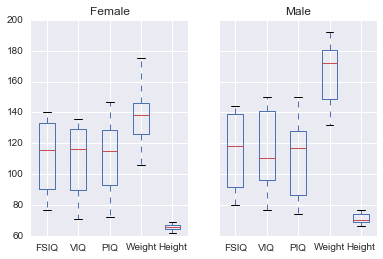

In [18]:
# Let's see if gender has an effect of those variables

grouped_gender.boxplot(column=['FSIQ','VIQ','PIQ', 'Weight', 'Height'], return_type= 'dict')

This provides a visualization of the spread in the data within each variable measured brokendown by sex.

In [8]:
# Let's see the numbers of the visualization we just conducted

grouped_gender.describe()

FSIQ     Height     MRI_Count         PIQ         VIQ  \
Gender                                                                      
Female count   20.000000  20.000000  2.000000e+01   20.000000   20.000000   
       mean   111.900000  65.765000  8.626546e+05  110.450000  109.450000   
       std     23.686327   2.288248  5.589356e+04   21.946046   21.670924   
       min     77.000000  62.000000  7.906190e+05   72.000000   71.000000   
       25%     90.250000  64.500000  8.280620e+05   93.000000   90.000000   
       50%    115.500000  66.000000  8.553650e+05  115.000000  116.000000   
       75%    133.000000  66.875000  8.826685e+05  128.750000  129.000000   
       max    140.000000  70.500000  9.913050e+05  147.000000  136.000000   
Male   count   18.000000  18.000000  1.800000e+01   18.000000   18.000000   
       mean   115.388889  71.372222  9.557537e+05  112.333333  115.111111   
       std     24.507235   3.367807  5.601591e+04   23.899299   24.547406   
       min     80.000000  66.300000  8.799870e+05   74.000000   77.000000   
       25%     91.750000  68.850000  9.255482e+05   86.750000   96.000000   
       50%    118.000000  70.250000  9.472415e+05  117.000000  110.500000   
       75%    139.000000  73.875000  9.628812e+05  128.000000  141.000000   
       max    144.000000  77.000000  1.079549e+06  150.000000  150.000000   

                  Weight  
Gender                    
Female count   20.000000  
       mean   137.200000  
       std     16.953807  
       min    106.000000  
       25%    125.750000  
       50%    138.500000  
       75%    146.250000  
       max    175.000000  
Male   count   18.000000  
       mean   166.444444  
       std     20.047656  
       min    132.000000  
       25%    148.750000  
       50%    172.000000  
       75%    180.750000  
       max    192.000000

In [9]:
# Let's see if any of the variables correlate with each other

data.corr()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.945114,0.934427,-0.051483,-0.118448,0.333714
VIQ,0.945114,1.000000,0.776020,-0.076088,-0.118976,0.300279
PIQ,0.934427,0.776020,1.000000,0.002512,-0.093156,0.377782
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.118448,-0.118976,-0.093156,0.699614,1.000000,0.588377
MRI_Count,0.333714,0.300279,0.377782,0.513378,0.588377,1.000000


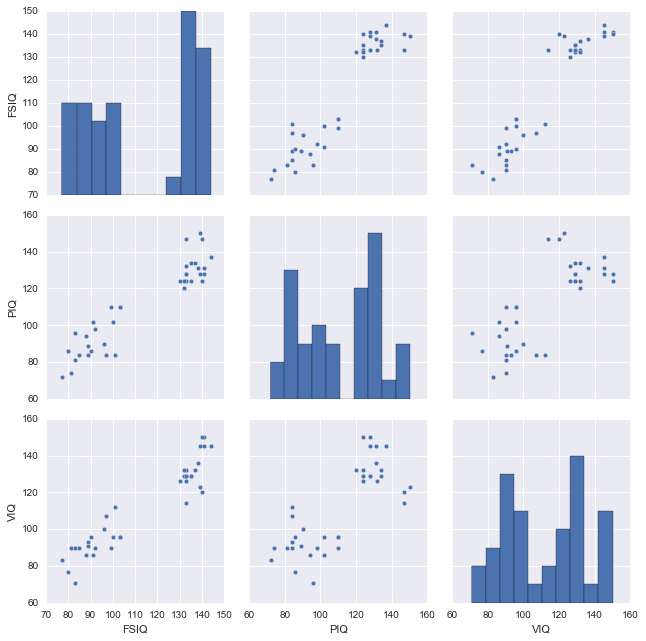

In [10]:
# Let's visualize that

sns.pairplot(data, vars= ['FSIQ','PIQ','VIQ'], size = 3.0)

The IQ types appear to have a binomial distribution. This could be due to a difference between males and females. We will investigate that further.

In [11]:
# Now let's start to test the difference in sexes.
# First we will start with the correlations.

grouped_gender.corr()

FSIQ    Height  MRI_Count       PIQ       VIQ    Weight
Gender                                                                       
Female FSIQ       1.000000 -0.059011   0.325697  0.939382  0.955717  0.038192
       Height    -0.059011  1.000000   0.174541 -0.001242 -0.146453  0.552357
       MRI_Count  0.325697  0.174541   1.000000  0.396157  0.254933  0.446271
       PIQ        0.939382 -0.001242   0.396157  1.000000  0.802652  0.113901
       VIQ        0.955717 -0.146453   0.254933  0.802652  1.000000 -0.021889
       Weight     0.038192  0.552357   0.446271  0.113901 -0.021889  1.000000
Male   FSIQ       1.000000 -0.385862   0.431388  0.930669  0.938321 -0.278140
       Height    -0.385862  1.000000   0.292849 -0.299593 -0.402762  0.406542
       MRI_Count  0.431388  0.292849   1.000000  0.528423  0.326555 -0.076875
       PIQ        0.930669 -0.299593   0.528423  1.000000  0.755048 -0.156863
       VIQ        0.938321 -0.402762   0.326555  0.755048  1.000000 -0.350453
       Weight    -0.278140  0.406542  -0.076875 -0.156863 -0.350453  1.000000

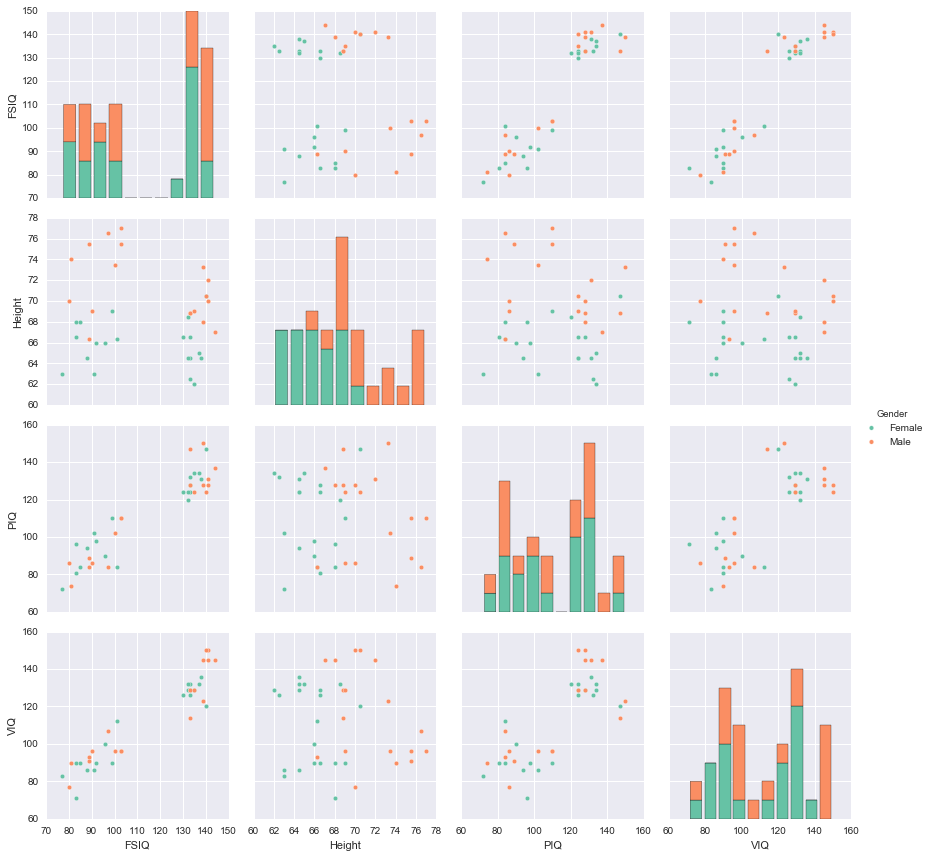

In [12]:
# Let's visualize those numbers

sns.pairplot(data, vars= ['FSIQ','Height','PIQ','VIQ'], hue= 'Gender', palette = 'Set2',size=3)

###### Let's test if the population mean of the VIQ test is 0.

In [13]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.132405743476752, pvalue=1.2294004595027533e-27)

With a p value = 1.229e-28, we can state that the population mean for the VIQ measure is not 0.

###### To test if this is significant, we need to conduct a 2-sample t-test.

In [14]:
# Separating the VIQ category into males and female data sets.

female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']

# Running the test
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.75515898492875122, pvalue=0.45506603948583713)

With the p value = 0.455, the seen result is not significant

In [15]:
# Let's compare IQ of male and female using a linear model

model = ols("VIQ ~ Gender + 1", data).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.5703
Date:                Sun, 24 Jul 2016   Prob (F-statistic):              0.455
Time:                        21:39:02   Log-Likelihood:                -172.16
No. Observations:                  38   AIC:                             348.3
Df Residuals:                      36   BIC:                             351.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        109.4500      5.160     21.

You can see this gives more statistical insight to the relationship, however the results are the same. There is no statistical signifance between VIQ and sex.

#### Now let's compare different types of IQ
* Let's test FISQ against PIQ

In [16]:
# Separating the data so I can compare them against each other
data_fisq = DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_comb = pd.concat((data_fisq, data_piq))

mod = ols("iq ~ type", data_comb).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1723
Date:                Sun, 24 Jul 2016   Prob (F-statistic):              0.679
Time:                        21:39:02   Log-Likelihood:                -345.83
No. Observations:                  76   AIC:                             695.7
Df Residuals:                      74   BIC:                             700.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     113.5526      3.766     30.153      

With the p value= 0.697, there is no significant statistical difference.